# PytzMLS2018: Python for ML and DS Research - Scikit-learn

<center>**Anthony Faustine (sambaiga@gmail.com)**</center>

# 5.1.Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is [Scikit-Learn](http://scikit-learn.org/stable/):a package that provides efficient versions of a large number of common algorithms. 
- [Scikit-learn](http://scikit-learn.org/) is a Python open source library designed to tackle Machine Learning problems from beginning to end. 
- Built on NumPy, SciPy, and matplotlib
- It is used and well praised by big companies like Evernote, Spotify etc as shown [here](http://scikit-learn.org/stable/testimonials/testimonials.html)

We aims to give an accessible introduction to how to use machine learning techniques using [scikit-learn](http://scikit-learn.org/) for your own projects and datasets. 




## 5.1.1  Scikit-Learn API

Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.

- **sklearn.datasets**: Includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.
- **sklearn.feature_selection**: Implements feature selection algorithms. It currently includes univariate filter selection methods and the recursive feature elimination algorithm.
- **sklearn.metrics**: includes score functions, performance metrics and pairwise metrics and distance computations.
- **sklearn.naive_bayes**: implements Naive Bayes algorithms.

## 5.1.2 Scikit-Learn's Estimator API

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

The steps in using the Scikit-Learn estimator API are as follows:

- Arrange data into a features matrix and target vector following the discussion below in section 1.3.
- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
   * Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments the estimator classes.
- Fit the model to your data by calling the **fit()** method of the model instance.
- Apply the Model to new data:
  * For supervised learning, often we predict labels for unknown data using the **predict()** method.
  * For unsupervised learning, we often transform or infer properties of the data using the **transform()** or **predict()** method.
- Evaluate the model
  


## 5.1.3 Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.

- Consider set of data in dataframe with rows ad columns.Here each row of the data refers to a single observation, and the number of rows is the total number of observation in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as $n_{samples}$.

- Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as $n_{features}$.

### 5.1.3.1 Features matrix

A two-dimensional numerical array or matrix with shape [$n_{samples}$, $n_{features}$]. By convention, this features matrix is often stored in a variable named $X$.

The samples (i.e., rows) always refer to the individual objects described by the dataset

The features (i.e., columns) always refer to the distinct observations that describe each sample.

### 5.1.3.2 Target array

One dimensional, with length $n_{samples}$ usually the quantity we want to predict from the data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/pima/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[features]
y = data.Outcome

In [9]:
X.shape

(768, 8)

In [10]:
y.shape

(768,)

## 5.2. Supervised learning example

## 5.2.1  Simple linear regression

In regression, we are interested in predicting a scalar-valued target, such as the price of a stock. By linear, we mean that the target must be predicted as a linear function of the inputs.

Consider the following data:

In [11]:
X = np.array([ 0.55623761,  0.55077588,  0.27762201,  0.95921018,  0.0956837 ,
        0.64471549,  0.85149188,  0.55415515,  0.64489205,  0.25350928,
        0.81841887,  0.76787552,  0.3463776 ,  0.42975755,  0.51326507,
        0.88745242,  0.46700522,  0.11441181,  0.03528545,  0.72198726,
        0.44392746,  0.60703492,  0.30947934,  0.97067108,  0.20131097,
        0.55954679,  0.30072729,  0.70617522,  0.49736816,  0.20816487,
        0.4141809 ,  0.93443168,  0.60429835,  0.41384493,  0.85989403,
        0.07354739,  0.70199998,  0.36112765,  0.15749281,  0.61203265,
        0.32702159,  0.98164674,  0.38167423,  0.67370885,  0.74778714,
        0.28591757,  0.73423083,  0.20570086,  0.36095281,  0.01289089,
        0.57648531,  0.06770663,  0.8807249 ,  0.72862818,  0.88651844,
        0.82253656,  0.73449858,  0.57400562,  0.31775974,  0.79437578,
        0.72936971,  0.17587664,  0.31999439,  0.06162332,  0.55069835,
        0.07848318,  0.46367232,  0.88656963,  0.77054617,  0.15059656,
        0.11075492,  0.47431977,  0.93649446,  0.11528399,  0.47179202,
        0.44430952,  0.98095376,  0.81822356,  0.56687681,  0.34295983,
        0.95481171,  0.9416362 ,  0.74449455,  0.08451585,  0.67201501,
        0.33974494,  0.20535398,  0.31689309,  0.54419625,  0.45039334,
        0.72623297,  0.23238259,  0.54935201,  0.5271361 ,  0.77528756,
        0.16509066,  0.57407955,  0.53232159,  0.26991462,  0.58202651])

In [12]:
y = np.array([ 1.09073178,  0.87705364,  0.53813056,  1.79756503,  0.44463208,
        1.35371022,  1.7369022 ,  1.38874705,  1.44013509,  0.55237873,
        1.73233007,  1.40347576,  0.66820119,  1.40709865,  0.93064174,
        1.96278042,  0.86183487,  0.23826412,  0.24581197,  1.36426266,
        0.69937493,  1.44757982,  0.43359181,  1.78991267,  0.19608985,
        1.09347291,  0.4723643 ,  1.58549403,  0.50008317,  0.39941469,
        0.81228127,  1.87523703,  1.32366021,  0.63414426,  1.67932234,
       -0.23617384,  1.50180948,  0.26563214,  0.28739881,  1.28417294,
        1.03433624,  1.96537267,  0.75855884,  1.71978389,  1.42698512,
        0.48402125,  1.61960246,  0.24214051,  0.7609597 ,  0.40168762,
        0.96582655,  0.42924411,  1.89036535,  1.28047164,  1.51244322,
        1.71619123,  0.77025205,  1.40236634,  0.70047884,  1.64659947,
        1.43503278,  0.07966009,  0.54599231,  0.54038079,  1.26614206,
        0.24295371,  0.8902031 ,  1.64911025,  1.42968399,  0.53267405,
        0.5634043 ,  1.00800583,  2.00998127,  0.08297076,  0.96948009,
        0.92242496,  1.90523025,  1.26608053,  0.96106417,  0.3261506 ,
        1.70010292,  2.11111934,  1.31668139,  0.31884149,  1.42518027,
        0.78828978, -0.02135849,  0.59541044,  0.99515104,  0.79022447,
        1.46546328,  0.34897952,  1.00840362,  0.9710038 ,  1.40021095,
        0.25636884,  0.57547639,  1.60640628,  0.30321808,  1.28503417])

Let use the above data to fit a simple linear regression $y=wx +b$ applying the steps in using the Scikit-Learn estimator API as presented in section 1.2.

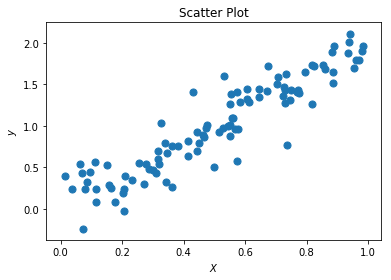

In [15]:
plt.scatter(X, y, s=50)
plt.title('Scatter Plot')
plt.xlabel('$X$')
plt.ylabel('$y$');

#### Arrange data into a features matrix and target vector

Here our target variable $y$ feature matrix is $X$. Let check the shape of $y$ and $X$

In [ ]:
# check the shape of target
y.shape

In [17]:
# check shape of X
X.shape

(100,)

Note the shape of $X$ it is 1D: We therefore need to massage the data X to make it a matrix of size [n_samples, n_features] as follows:

In [19]:
#X = X[:, np.newaxis]
X=X.reshape(-1,1)
X.shape

(100, 1)

####  Let Choose a class of model

Import  the linear regression class:

In [ ]:
from sklearn.linear_model import LinearRegression

**Note** more general linear regression models exist as well follow this [link](http://scikit-learn.org/stable/modules/linear_model.html)

#### Instantiate model and select hyperparameters

This step involve defining the model with its associated parameters

In [ ]:
model = LinearRegression()

####  Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [ ]:
# fit the model
model.fit(X,y)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Thus our model is therefore: $$y = 1.928544x + 0.020108483042$$

#### Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data.

For the sake of this example, our "new data" will be a grid of X values, and we will ask what y values the model predicts:

Let select the last ten X data use our model to predict y variable.

In [ ]:
X_new = X[0:10]

In [ ]:
y_pred = model.predict(X_new)

Let visualize the actual values vs predicted values

In [ ]:
y_actual = y[0:10]

In [ ]:
plt.scatter(X_new, y_actual, color ='b',label="Actual", s=80)
plt.scatter(X_new, y_pred, color = 'g', label="prediction", s=80)
plt.legend(loc='best')
plt.title('Model Visualization')
plt.xlabel('$X$')
plt.ylabel('$y$');

## Evaluate Model

There are 3 different APIs for evaluating the quality of a model’s predictions:

- Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. 
- Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. 
- Metric functions: The metrics module implements functions assessing prediction error for specific purposes.  Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

For details refer to this [link](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

For example the above regression problem we can find the Root Mean Square(RMS) as follows

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_actual, y_pred)

## 5.2.2 Supervised learning: Classification.

Our question will be this: given a model trained on a portion of admission data, Predict wether a student with given grades will be admitted or not.

For this task, we will use an extremely simple logistic regression.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. 

This could be done by hand, but it is more convenient to use the **train_test_split utility** function:

In [20]:
admission = pd.read_csv('../data/admission/admission.csv', names = ["grade1", "grade2", "remark"])
admission.head()

,grade1,grade2,remark
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

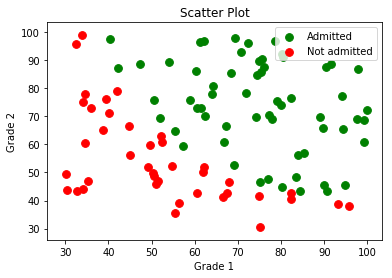

In [21]:
admitted_1 =admission[admission['remark']==1]['grade1']
admitted_2 =admission[admission['remark']==1]['grade2']
not_admitted_1 =admission[admission['remark']==0]['grade1']
not_admitted_2 =admission[admission['remark']==0]['grade2']

plot_name = "scatter_1"
plt.scatter(admitted_1,admitted_2,c='green',s=60)
plt.scatter(not_admitted_1,not_admitted_2,c='red',s=60)
plt.title('Scatter Plot')
plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.legend(('Admitted','Not admitted'),scatterpoints=1,loc='upper right');

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

* a training set that the learning algorithm uses to fit the model
* a test set to evaluate the generalization performance of the model

The train_test_split function from the model_selection module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

In [22]:
features = ['grade1', 'grade2']
X = admission[features]
y = admission.remark

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [ ]:
from sklearn.linear_model import LogisticRegression   # 1. choose model class
model = LogisticRegression()                          # 2. instantiate model
model.fit(X_train, y_train)                           # 3. fit model to data

In [ ]:
# 4. predict on new data
y_pred = model.predict(X_test)    

We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called accuracy:

In [ ]:
from sklearn.metrics import accuracy_score
test_acc  = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}" .format(test_acc))

It clear that our model achieve a test accuracy of $96\%$ 

## Another classifier: K Nearest Neighbors¶
Another popular and easy to understand classifier is K nearest neighbors (kNN). It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for LogisticRegression above.

In [ ]:
# defining the model with its associated parameters
from sklearn.neighbors import KNeighborsClassifier       # 1. choose model class
knn = KNeighborsClassifier(n_neighbors=2)               # 2. instantiate model
knn.fit(X_train, y_train)                                # 3. fit model to data

In [ ]:
# 4. predict on new data
y_pred = knn.predict(X_test)                      
test_acc  = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}" .format(test_acc))

It clear that our model achieve a test accuracy of $80\%$ 

### Exercise¶
Play with different values of the n_neighbors and observe how test accuracy change.

## Another classifier:  RANDOM FOREST¶

A random forest is a 'meta estimator'. It will fit a number of decision trees (we'll have to tell it how many) on various sub-samples of the dataset. Then it will use averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier(n_estimators=10)
rForest.fit(X_train, y_train) 

In [ ]:
y_pred = rForest.predict(X_test)                      
test_acc  = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}" .format(test_acc))

It clear that our model achieve a test accuracy of $92\%$ 

### Exercise¶
Play with different values of the n_estimators and observe how  test accuracy change.

## References

* [Introduction to Machine Learning in Python with scikit-learn](http://ipython-books.github.io/featured-04/)
* [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)
* [Scikit-learn tutorial at SciPy2016](https://github.com/amueller/scipy-2016-sklearn)